In [87]:
import pandas as pd
from pandas import DataFrame
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.cm import get_cmap
import numpy as np
from matplotlib import pyplot
%matplotlib inline
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering


# Importing and Examining the Garmin Data

In [2]:
garmin = pd.read_csv("chi_marathon1.csv") 

In [3]:
garmin.head(3)

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Aerobic TE,Avg Run Cadence,...,Grit,Flow,Climb Time,Bottom Time,Min Temp,Surface Interval,Decompression,Best Lap Time,Number of Runs,Max Temp
0,Treadmill Running,5/3/19,Treadmill Running,1.30,103,0:11:12,158,185,2.3,156,...,0,0,0:00,0:00,77.0,0:00,No,04:02.7,2.0,0
1,Treadmill Running,5/6/19,Treadmill Running,1.16,71,08:54.2,139,154,1.6,164,...,0,0,0:00,0:00,77.0,0:00,No,01:37.7,2.0,0
2,Running,5/15/19,Chicago Running,2.00,135,0:16:40,142,159,2.2,172,...,0,0,0:00,0:00,68.0,0:00,No,00:01.1,3.0,0


In [4]:
#examine how large the table is
garmin.shape

(122, 29)

In [5]:
#Cleaning Data

In [13]:
#Remove any unecessary columns
garmin1 = garmin.drop(['Aerobic TE','Avg Vertical Ratio','Avg Vertical Oscillation',
             'Training Stress Score¬Æ','Grit','Flow','Climb Time',
             'Bottom Time','Surface Interval','Decompression'],axis=1)

In [14]:
#Remove any missing values
garmin1.dropna

<bound method DataFrame.dropna of          Activity Type      Date              Title  Distance Calories  \
0    Treadmill Running    5/3/19  Treadmill Running      1.30      103   
1    Treadmill Running    5/6/19  Treadmill Running      1.16       71   
2              Running   5/15/19    Chicago Running      2.00      135   
3              Running   5/15/19    Chicago Running      1.01       80   
4    Treadmill Running   5/16/19  Treadmill Running      1.01       73   
..                 ...       ...                ...       ...      ...   
117  Treadmill Running  10/20/19  Treadmill Running      2.20      163   
118  Treadmill Running  10/24/19  Treadmill Running      2.72      225   
119  Treadmill Running  10/27/19  Treadmill Running      1.14       57   
120  Treadmill Running  10/29/19  Treadmill Running      1.44      120   
121  Treadmill Running  10/30/19  Treadmill Running      3.05      218   

        Time  Avg HR  Max HR  Avg Run Cadence  Max Run Cadence   Pace  \
0   

In [15]:
#cleaned table
garmin1.head()

,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Min Temp,Best Lap Time,Number of Runs,Max Temp
0,Treadmill Running,5/3/19,Treadmill Running,1.30,103,0:11:12,158,185,156,174,8:38,6:50,0,0,1.17,77.0,04:02.7,2.0,0
1,Treadmill Running,5/6/19,Treadmill Running,1.16,71,08:54.2,139,154,164,176,7:42,6:51,0,0,1.27,77.0,01:37.7,2.0,0
2,Running,5/15/19,Chicago Running,2.00,135,0:16:40,142,159,172,199,8:19,5:22,0,23,1.13,68.0,00:01.1,3.0,0
3,Running,5/15/19,Chicago Running,1.01,80,08:49.4,152,164,167,182,8:46,7:49,10,16,1.10,73.4,00:03.6,2.0,0
4,Treadmill Running,5/16/19,Treadmill Running,1.01,73,07:58.7,155,162,171,176,7:53,6:56,0,0,1.19,75.2,00:04.9,2.0,0


In [22]:
#examine datatypes and conververt
garmin1.astype({'Number of Runs': 'int32'}).dtypes

Activity Type         object
Date                  object
Title                 object
Distance             float64
Calories              object
Time                  object
Avg HR                 int64
Max HR                 int64
Avg Run Cadence        int64
Max Run Cadence        int64
Pace                  object
Best Pace             object
Elev Gain              int64
Elev Loss              int64
Avg Stride Length    float64
Min Temp             float64
Best Lap Time         object
Number of Runs         int32
Max Temp               int64
dtype: object

In [29]:
garmin1['Date'] = pd.to_datetime(garmin1['Date'])
garmin1.dtypes

Activity Type                object
Date                 datetime64[ns]
Title                        object
Distance                    float64
Calories                     object
Time                         object
Avg HR                        int64
Max HR                        int64
Avg Run Cadence               int64
Max Run Cadence               int64
Pace                         object
Best Pace                    object
Elev Gain                     int64
Elev Loss                     int64
Avg Stride Length           float64
Min Temp                    float64
Best Lap Time                object
Number of Runs              float64
Max Temp                      int64
dtype: object

# Descriptive Statistics on Garmin data

In [30]:
total_distance = garmin1['Distance'].sum(skipna=True)
print("Total Distance ran", total_distance, "miles")

mean_distance = garmin1['Distance'].mean()
print("Average Distance ran", mean_distance, "miles")

max_dist = garmin1['Distance'].max()
print("Longest Distance ran", max_dist, "miles")


min_dist = garmin1['Distance'].min()
print("Shortest Distance ran", min_dist, "miles")

min_pace = garmin1['Pace'].min()
print("Fastest pace", min_pace)

max_pace = garmin1['Pace'].max()
print("Slowest pace", max_pace)

Total Distance ran 512.77 miles
Average Distance ran 4.203032786885246 miles
Longest Distance ran 26.49 miles
Shortest Distance ran 0.13 miles
Fastest pace 10:02
Slowest pace 9:49


In [31]:
garmin1['Number of Runs'].describe()

count    122.000000
mean       5.000000
std        4.160022
min        1.000000
25%        2.000000
50%        4.000000
75%        6.000000
max       27.000000
Name: Number of Runs, dtype: float64

# Basic Visualization

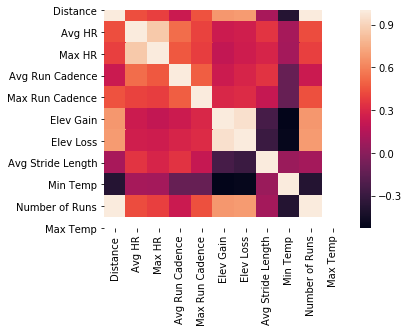

In [44]:
#Correlation among variables
cor = garmin1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

We have obtained the heatmap of correlation among the variables. 
The color palette in the side represents the amount of correlation among the variables.
The lighter shade represents high correlation. We can see that distance and the number of runs has a high correlation, 
which makes sense as I was running more those days. Alternatively you can see that the min temp and distance have a very
low correlation. 


In [77]:
#Time Series
garmin2 = garmin1 
garmin2 = garmin2.set_index('Date')
garmin2.head(5)

,Activity Type,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Min Temp,Best Lap Time,Number of Runs,Max Temp
Date,,,,,,,,,,,,,,,,,,
2019-05-03,Treadmill Running,Treadmill Running,1.30,103,0:11:12,158,185,156,174,8:38,6:50,0,0,1.17,77.0,04:02.7,2.0,0
2019-05-06,Treadmill Running,Treadmill Running,1.16,71,08:54.2,139,154,164,176,7:42,6:51,0,0,1.27,77.0,01:37.7,2.0,0
2019-05-15,Running,Chicago Running,2.00,135,0:16:40,142,159,172,199,8:19,5:22,0,23,1.13,68.0,00:01.1,3.0,0
2019-05-15,Running,Chicago Running,1.01,80,08:49.4,152,164,167,182,8:46,7:49,10,16,1.10,73.4,00:03.6,2.0,0
2019-05-16,Treadmill Running,Treadmill Running,1.01,73,07:58.7,155,162,171,176,7:53,6:56,0,0,1.19,75.2,00:04.9,2.0,0


In [52]:
#Convert the data frame index to a datetime index
date_rng = pd.date_range(start='2019-05-03', end='2019-10-30', freq='H')
string_date_rng = [str(x) for x in date_rng]
string_date_rng

['2019-05-03 00:00:00',
 '2019-05-03 01:00:00',
 '2019-05-03 02:00:00',
 '2019-05-03 03:00:00',
 '2019-05-03 04:00:00',
 '2019-05-03 05:00:00',
 '2019-05-03 06:00:00',
 '2019-05-03 07:00:00',
 '2019-05-03 08:00:00',
 '2019-05-03 09:00:00',
 '2019-05-03 10:00:00',
 '2019-05-03 11:00:00',
 '2019-05-03 12:00:00',
 '2019-05-03 13:00:00',
 '2019-05-03 14:00:00',
 '2019-05-03 15:00:00',
 '2019-05-03 16:00:00',
 '2019-05-03 17:00:00',
 '2019-05-03 18:00:00',
 '2019-05-03 19:00:00',
 '2019-05-03 20:00:00',
 '2019-05-03 21:00:00',
 '2019-05-03 22:00:00',
 '2019-05-03 23:00:00',
 '2019-05-04 00:00:00',
 '2019-05-04 01:00:00',
 '2019-05-04 02:00:00',
 '2019-05-04 03:00:00',
 '2019-05-04 04:00:00',
 '2019-05-04 05:00:00',
 '2019-05-04 06:00:00',
 '2019-05-04 07:00:00',
 '2019-05-04 08:00:00',
 '2019-05-04 09:00:00',
 '2019-05-04 10:00:00',
 '2019-05-04 11:00:00',
 '2019-05-04 12:00:00',
 '2019-05-04 13:00:00',
 '2019-05-04 14:00:00',
 '2019-05-04 15:00:00',
 '2019-05-04 16:00:00',
 '2019-05-04 17:

In [54]:
# convert the strings to timestamps
timestamp_date_rng = pd.to_datetime(string_date_rng, infer_datetime_format=True)
timestamp_date_rng

DatetimeIndex(['2019-05-03 00:00:00', '2019-05-03 01:00:00',
               '2019-05-03 02:00:00', '2019-05-03 03:00:00',
               '2019-05-03 04:00:00', '2019-05-03 05:00:00',
               '2019-05-03 06:00:00', '2019-05-03 07:00:00',
               '2019-05-03 08:00:00', '2019-05-03 09:00:00',
               ...
               '2019-10-29 15:00:00', '2019-10-29 16:00:00',
               '2019-10-29 17:00:00', '2019-10-29 18:00:00',
               '2019-10-29 19:00:00', '2019-10-29 20:00:00',
               '2019-10-29 21:00:00', '2019-10-29 22:00:00',
               '2019-10-29 23:00:00', '2019-10-30 00:00:00'],
              dtype='datetime64[ns]', length=4321, freq=None)

In [56]:
#resample the data at a different frequency
garmin2.resample('D').mean()

,Distance,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Elev Gain,Elev Loss,Avg Stride Length,Min Temp,Number of Runs,Max Temp
Date,,,,,,,,,,,
2019-05-03,1.30,158.0,185.0,156.0,174.0,0.0,0.0,1.17,77.0,2.0,0.0
2019-05-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-06,1.16,139.0,154.0,164.0,176.0,0.0,0.0,1.27,77.0,2.0,0.0
2019-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-10-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-10-27,1.14,100.0,109.0,120.0,126.0,0.0,0.0,0.91,75.2,2.0,0.0
2019-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


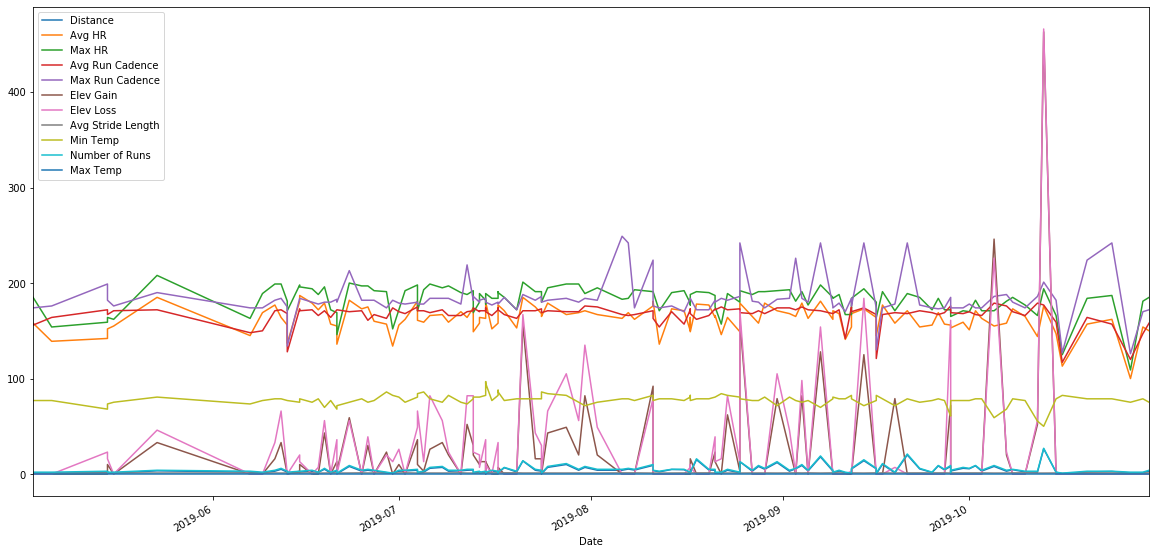

In [67]:
garmin2.plot(figsize=(20,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d3d1390>,
      dtype=object)

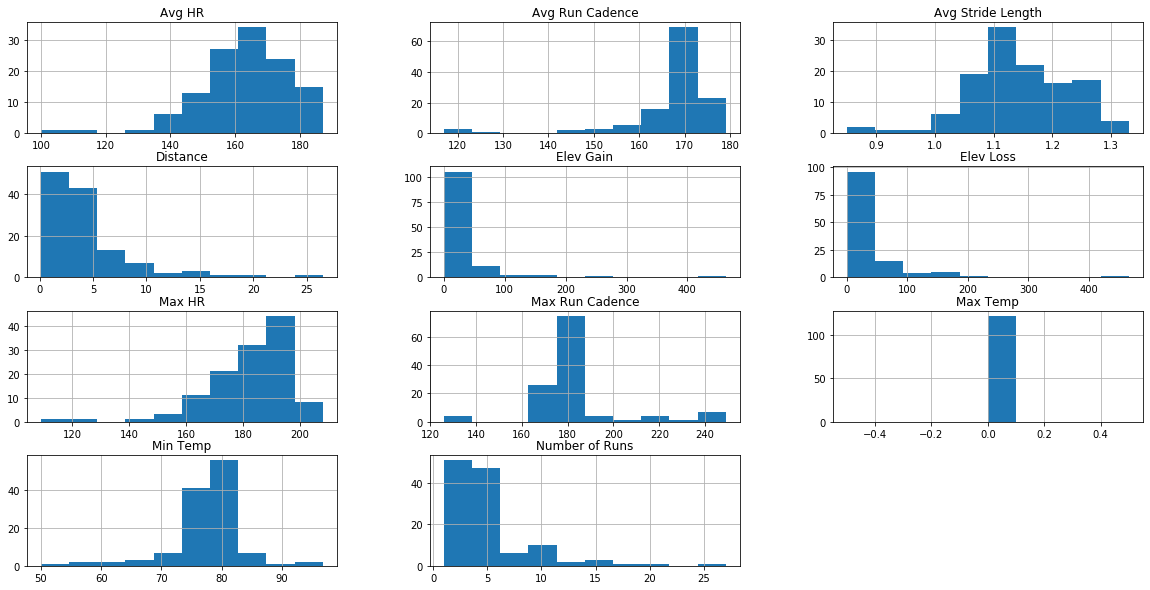

In [69]:
garmin2.hist(figsize=(20,10))


In [89]:
#clustering
#examining the Distance in relation to heart rate by creating a subset of the cleaned garmin data
garmin_subset = garmin1[['Distance','Avg HR']].copy()
garmin_subset.head(3)

,Distance,Avg HR
0,1.30,158
1,1.16,139
2,2.00,142


In [92]:
#specify the number of clusters
kmeans = KMeans(n_clusters=3).fit(garmin_subset)
centroids = kmeans.cluster_centers_
print(centroids)

[[  2.91224138 158.5       ]
 [  6.538      174.7       ]
 [  1.21142857 136.07142857]]


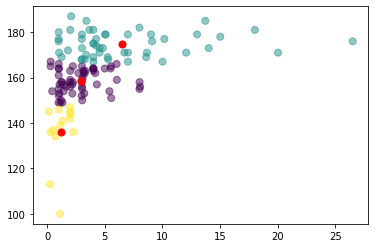

In [93]:
#3 clusters with 3 distinct centroids
plt.scatter(garmin_subset['Distance'], garmin_subset['Avg HR'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Note that the center of each cluster (in red) represents the mean of all the observations that belong to that cluster.

As you may also see, the observations that belong to a given cluster are closer to the center of that cluster, in comparison to the centers of other clusters

In [94]:
#4 clusters
kmeans1 = KMeans(n_clusters=4).fit(garmin_subset)
centroids1 = kmeans.cluster_centers_
print(centroids1)

[[  2.91224138 158.5       ]
 [  6.538      174.7       ]
 [  1.21142857 136.07142857]]


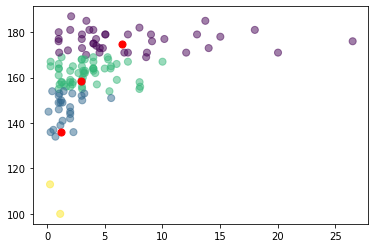

In [95]:
plt.scatter(garmin_subset['Distance'], garmin_subset['Avg HR'], c= kmeans1.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids1[:, 0], centroids1[:, 1], c='red', s=50)
plt.show()

Here we have managed to clearly segregate the data into subgroups, based on the conditions of K means clustering algorithm. These subgroups have no labels as K means clustering is an unsupervised learning technique.

The interpretation of the results is domain specific. Each group represents a different distance with an average heart rate associated with it.

# Calculate average speed and pace

In [ ]:
#Average Speed Calculation 

sec_to_hr = 1/3600 # 3600 seconds in 1 hour
min_to_hr = 1/60 # 60 minutes in 1 hour